# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random as rd
import numpy as np
import pandas as pd

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
diceRoll_10 = [rd.choice(range(1,7)) for i in range(10)]
diceRolls = pd.DataFrame(diceRoll_10,columns=['DiceRoll'])
diceRolls

,DiceRoll
0,2
1,5
2,2
3,1
4,4
5,3
6,6
7,3
8,2
9,6


#### 2.- Plot the results sorted by value.

In [3]:
# your code here
diceRolls.sort_values(by='DiceRoll')

,DiceRoll
3,1
0,2
2,2
8,2
5,3
7,3
4,4
1,5
6,6
9,6


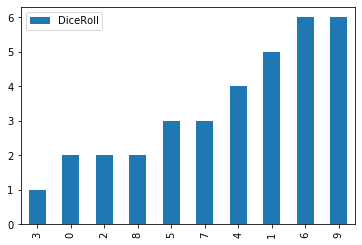

In [4]:
diceRolls.sort_values(by='DiceRoll').plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

1    1
2    3
3    2
4    1
5    1
6    2
Name: DiceRoll, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002857EEEF688>]],
      dtype=object)

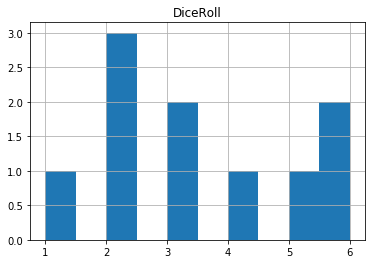

In [5]:
# your code here
diceFT = diceRolls.DiceRoll.value_counts().sort_index()
print(diceFT)
diceRolls.hist()

In [6]:
"""
your comments here

1) Axis --> bar plot on top, dice numbers are ordered in the y axis, whereas the histogram they are ordered on the x axis.
2) Axis --> the bar plot has the number of rounds in the x axis, which is not in an ordered sequence
3) Basically the frequency table (which is shown in the histogram above) counts occurrencies of each number,
independently on which round they appear.
4) On the contrast, the bar plot shows the sorted dice values (in y axis) obtained along the different
rounds (un-ordered in the x axis)

"""

'\nyour comments here\n\n1) Axis --> bar plot on top, dice numbers are ordered in the y axis, whereas the histogram they are ordered on the x axis.\n2) Axis --> the bar plot has the number of rounds in the x axis, which is not in an ordered sequence\n3) Basically the frequency table (which is shown in the histogram above) counts occurrencies of each number,\nindependently on which round they appear.\n4) On the contrast, the bar plot shows the sorted dice values (in y axis) obtained along the different\nrounds (un-ordered in the x axis)\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def meanVal(npArray):
    return npArray.sum()/len(npArray)
meanVal(diceRolls.DiceRoll)

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def freqTable(npArray):
    uniqueArray = np.unique(npArray)
    countsArray = np.array([(npArray == elem).sum() for elem in uniqueArray])
    return uniqueArray,countsArray

def meanFromFreq(uniqueArray,countsArray):
    return (uniqueArray*countsArray).sum()/sum(countsArray)

uniqueA,countsA = freqTable(diceRolls.DiceRoll)
meanFromFreq(uniqueA,countsA)

3.4

In [9]:
# function to calculate standard dev
def stdVal(npArray):
    meanValue = meanVal(npArray)
    return (((npArray - meanValue)**2).sum()/(len(npArray)-1))**0.5
stdVal(diceRolls.DiceRoll)

1.776388345929897

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def medianCalc(array):
    sortedArray = np.sort(array)
    lenA = len(array)
    if len(array)%2 == 0:
        return (sortedArray[int(lenA/2)-1]+sortedArray[int((lenA/2))])/2
    else:
        return sortedArray[int((lenA-1)/2)]

medianCalc(diceRolls.DiceRoll)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
def quantileCalc(array):
    median = medianCalc(array)
    sortedArray = np.sort(array)
    lenA = len(array)
    if lenA%2 == 0:
        pointM = int(lenA/2)
        redArray1 = np.append(sortedArray[:pointM-1],median)
        q1 = medianCalc(redArray1)
        redArray3 = np.append(median,sortedArray[pointM+1:])
        q3 = medianCalc(redArray3)
    else:
        pointM = int((lenA+1)/2)
        redArray1 = sortedArray[:pointM]
        q1 = medianCalc(redArray1)
        redArray3 = sortedArray[pointM-1:]
        q3 = medianCalc(redArray3)
    
    return q1,median,q3

quantileCalc(diceRolls.DiceRoll)


(2.0, 3.0, 5.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

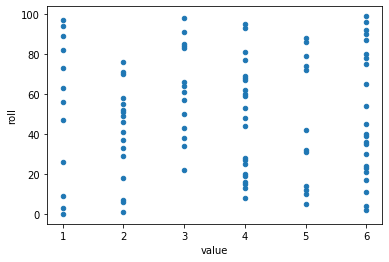

In [12]:
# your code here
diceCSVdata = pd.read_csv('../data/roll_the_dice_hundred.csv')
diceCSVdata.sort_values(by='value').plot(x='value',y='roll',kind='scatter')

In [13]:
"""
your comments here

We can observe that the values obtained are somehow equally distributed.

"""

'\nyour comments here\n\nWe can observe that the values obtained are somehow equally distributed.\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here
meanVal(diceCSVdata.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [15]:
# your code here
uniqueA,countsA = freqTable(diceCSVdata.value)

pd.DataFrame(list(zip(uniqueA,countsA)),columns=['values','counts'])

,values,counts
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

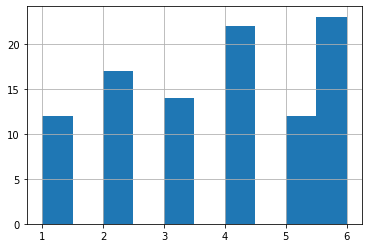

In [16]:
# your code here
diceCSVdata.value.hist()

In [17]:
"""
your comments here

The mean is quite aligned to that of an equally distributed dice sample (that is 3.5)
Indeed, being the actual mean (3.74) a bit higher than 3.5, it shows this distribution is
somehow a bit skewed to the left.

"""

'\nyour comments here\n\nThe mean is quite aligned to that of an equally distributed dice sample (that is 3.5)\nIndeed, being the actual mean (3.74) a bit higher than 3.5, it shows this distribution is\nsomehow a bit skewed to the left.\n\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [18]:
# your code here
diceCSVdata = pd.read_csv('../data/roll_the_dice_thousand.csv')
uniqueA,countsA = freqTable(diceCSVdata.value)

pd.DataFrame(list(zip(uniqueA,countsA)),columns=['values','counts'])

,values,counts
0,1,175
1,2,167
2,3,175
3,4,168
4,5,149
5,6,166


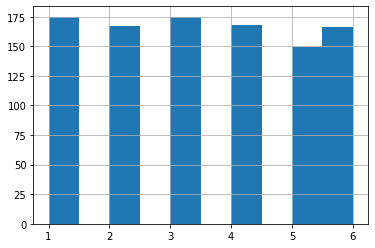

In [19]:
diceCSVdata.value.hist()

In [20]:
"""
your comments here

As long as we get more samples, we get a more equally distribution.

The result tends to the probability of obtaining a value in a dice (which is 1/6)

"""

'\nyour comments here\n\nAs long as we get more samples, we get a more equally distribution.\n\nThe result tends to the probability of obtaining a value in a dice (which is 1/6)\n\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [21]:
# your code here
ageCSVdata = pd.read_csv('../data/ages_population.csv')
uniqueA,countsA = freqTable(ageCSVdata.observation)

pd.DataFrame(list(zip(uniqueA,countsA)),columns=['ages','counts'])

,ages,counts
0,1.0,2
1,2.0,2
2,4.0,1
3,5.0,2
4,6.0,2
...,...,...
67,69.0,1
68,70.0,1
69,71.0,1
70,73.0,1


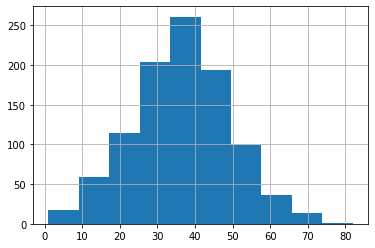

In [22]:
ageCSVdata.observation.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [23]:
# your code here (using the functions coded by myself)
print(f"Mean value is {meanVal(ageCSVdata.observation)}")
print(f"Standard deviation is {stdVal(ageCSVdata.observation)}")

Mean value is 36.56
Standard deviation is 12.81649962597677


In [24]:
"""
your comments here

The values definitely fall in the ranges guessed given that age is normally distributed.
I expect the mean to fall between 30 and 40 (exact value 36.56) and the standard
deviation (std) to be around 15 (hypothesis: in a normal distribution, about 70% of the samples
fall between mean +/- std)

"""

'\nyour comments here\n\nThe values definitely fall in the ranges guessed given that age is normally distributed.\nI expect the mean to fall between 30 and 40 (exact value 36.56) and the standard\ndeviation (std) to be around 15 (hypothesis: in a normal distribution, about 70% of the samples\nfall between mean +/- std)\n\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [25]:
# your code here
ageCSVdata = pd.read_csv('../data/ages_population2.csv')
uniqueA,countsA = freqTable(ageCSVdata.observation)

pd.DataFrame(list(zip(uniqueA,countsA)),columns=['ages','counts'])

,ages,counts
0,19.0,3
1,20.0,13
2,21.0,17
3,22.0,35
4,23.0,41
5,24.0,78
6,25.0,98
7,26.0,120
8,27.0,125
9,28.0,139


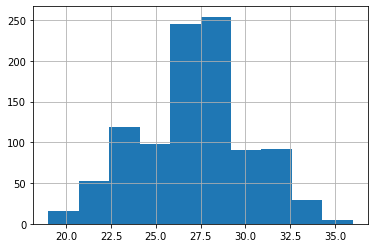

In [26]:
ageCSVdata.observation.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [27]:
"""
your comments here

Still the distribution is normal but the extremes (max/min) are very different.
The mean is different, and the standard distribution would be much smaller.

"""

'\nyour comments here\n\nStill the distribution is normal but the extremes (max/min) are very different.\nThe mean is different, and the standard distribution would be much smaller.\n\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [28]:
# your code here
print(f"Mean value is {meanVal(ageCSVdata.observation)}")
print(f"Standard deviation is {stdVal(ageCSVdata.observation)}")

Mean value is 27.155
Standard deviation is 2.9698139326891835


In [29]:
"""
your comments here

The population is younger, with about a 25% of reduction in the mean.
The population age is much more concentraded around the mean value compared to step2,
given by a reduction of about 75% in the standard deviation

"""

'\nyour comments here\n\nThe population is younger, with about a 25% of reduction in the mean.\nThe population age is much more concentraded around the mean value compared to step2,\ngiven by a reduction of about 75% in the standard deviation\n\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [30]:
# your code here
ageCSVdata = pd.read_csv('../data/ages_population3.csv')
uniqueA,countsA = freqTable(ageCSVdata.observation)

pd.DataFrame(list(zip(uniqueA,countsA)),columns=['ages','counts'])

,ages,counts
0,1.0,1
1,2.0,2
2,4.0,2
3,5.0,1
4,7.0,1
...,...,...
70,73.0,6
71,74.0,6
72,75.0,2
73,76.0,1


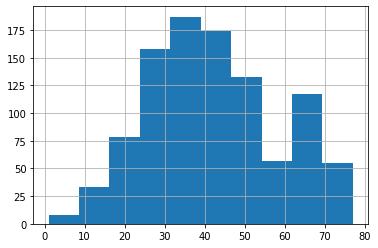

In [31]:
ageCSVdata.observation.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [32]:
# your code here
print(f"Mean value is {meanVal(ageCSVdata.observation)}")
print(f"Standard deviation is {stdVal(ageCSVdata.observation)}")

Mean value is 41.989
Standard deviation is 16.14470595986593


In [33]:
"""
your comments here
Basically the extremes of the sample are similar.
However, the mean is higher (about 15%), the values are less concentraded around
this mean (increased standard deviation by 26%) while the distribution is somehow
skewed to the right.

"""

'\nyour comments here\nBasically the extremes of the sample are similar.\nHowever, the mean is higher (about 15%), the values are less concentraded around\nthis mean (increased standard deviation by 26%) while the distribution is somehow\nskewed to the right.\n\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [34]:
# your code here
quantileCalc(ageCSVdata.observation)

(30.0, 40.0, 53.0)

In [35]:
"""
your comments here

The results of quantiles is Q1: 30, Q2: 40 (median) and Q3: 53.
A median closer to Q1 confirms our impression that the distribution is
skewed to the right. The same can be said being the mean (42.0) about 5% higher
than the median (40).

"""

'\nyour comments here\n\nThe results of quantiles is Q1: 30, Q2: 40 (median) and Q3: 53.\nA median closer to Q1 confirms our impression that the distribution is\nskewed to the right. The same can be said being the mean (42.0) about 5% higher\nthan the median (40).\n\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [36]:
# your code here
print(f"Quartile 10% is: {ageCSVdata.observation.quantile(0.1)}")
print(f"Quartile 90% is: {ageCSVdata.observation.quantile(0.9)}")

Quartile 10% is: 22.0
Quartile 90% is: 67.0


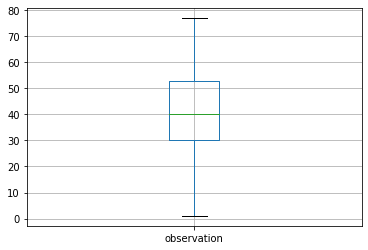

In [37]:
"""
your comments here

Whereas the interquartile range clearly shows a skewed right distribution
(median closer to Q1), the quartile below Q1 shows a longer arm compared
to the quartile above Q2 (see box plot below). This is confirmed being
the quartile 10%: 22 (a distance to minimum of 21) whereas the
quartile 90%: 67 (a distance to maximum of 10)

"""

ageCSVdata.boxplot()


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [38]:
# your code here

In [39]:
"""
your comments here
"""

'\nyour comments here\n'